In [1]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          4.4                         
year           2018                        
month          03                          
day            15                          
svn rev        74408                       
language       R                           
version.string R version 3.4.4 (2018-03-15)
nickname       Someone to Lean On          



#### Librerías y funciones

In [2]:
library("RColorBrewer", lib.loc="~/R/x86_64-pc-linux-gnu-library/3.4")
library("hexbin", lib.loc="~/R/x86_64-pc-linux-gnu-library/3.4")
library('MASS')
library('readr')
library("NbClust", lib.loc="~/R/x86_64-pc-linux-gnu-library/3.4")
library("factoextra", lib.loc="~/R/x86_64-pc-linux-gnu-library/3.4")




imageKernel = function(hcen,xlab='',ylab='',tit=' ',puntos=c(),box=c(),col='white',
                      leg=c(),lfill=c(),ltitle=' '){

  rf <- colorRampPalette(rev(brewer.pal(11,'Spectral')))
  image(hcen,col=rf(32),main=tit,xlab=xlab,ylab=ylab)
  grid()
  minl=round(min(hcen$z),2)
  maxl=round(max(hcen$z),2)
  medl=round((maxl-minl)/2,2)
  
  #leg=c(minl,medl,maxl)  
  #lfill=c(rf(32)[1],rf(32)[16],rf(32)[32])
  if (length(leg)>1){
      posx=max(hcen$x)-2
      posy=max(hcen$y)
      legend(posx,posy,legend=leg,fill =lfill ,title = ltitle)
      
  }
  
  if (length(puntos)>1){
    points(puntos,cex=0.4,pch=8,col=col)
  }
  if (length(box)==4){
    rect(xleft = box[1],ybottom = box[3],xright = box[2],ytop = box[4])
    
  }
}




Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


#### Datos
Calificaciones obtenidas por un conjunto de alumnos de un IES durante el curso 2015-16 en cada una de las evaluaciones. Las notas de la tercera evaluación son las de la convocatoria ordinaria del curso.

Solo se consideran los alumnos de los que se disponen las calificaciones de las tres evaluaciones. Se consideran todos los niveles de ESO y 1º de Bachillerato. 

Las variables son:
* Id: identidad del alumn
* ܹNivel: curso
* Ens: ESO o Bachillerato (Bac)
* Grupo: grupo de referencia en el que cursa el alumn (tutoría)
* Tut: Código que resume Ens-Nivel-Grupo
* aval: evaluación
* nasig: número de asignaturas que cursa el alumn
* nsusp: número de suspensos en el boletín de notas
* Medidas referidas al espectro de notas:
    * Q50: mediana
    * IQR: recorrido intercuartílico
    * med: media
    * std: desviación típica
    * S: entropía


In [3]:
data <- read_delim("fullFeat.csv", ";", 
                               escape_double = FALSE, 
                               col_types = cols(Ens = col_factor(levels = c("ESO","BAC")), 
                                                Grup = col_factor(levels = c("A","B", "C", "D")), 
                                                Nivel = col_factor(levels = c("1","2", "3", "4"))),
                               trim_ws = TRUE)


data$Id=as.factor(data$Id)
data$Ens=as.factor(data$Ens)
data$Nivel=as.factor(data$Nivel)
data$Tut=as.factor(data$Tut)


La composición por niveles y enseñanzas es

In [4]:
table(data[data$aval==1,]$Ens,data[data$aval==1,]$Nivel)

     
       1  2  3  4
  ESO 86 59 96 74
  BAC 70  0  0  0

#### Exploración de datos

,aval,nasig,nsusp,Q50,IQR,med,std,S
aval,1.00000000,0.056633338,-0.1287796,0.061676150,-0.142997006,0.072139989,-0.12082629,-0.1727755
nasig,0.05663334,1.000000000,0.1345149,-0.008788039,-0.008851278,0.001841367,0.03841639,0.1697798
nsusp,-0.12877964,0.134514902,1.0000000,-0.842768547,0.289251137,-0.870023436,0.38326121,0.2028887
Q50,0.06167615,-0.008788039,-0.8427685,1.000000000,-0.259513352,0.970900650,-0.37548720,-0.1617468
IQR,-0.14299701,-0.008851278,0.2892511,-0.259513352,1.000000000,-0.272587583,0.76841432,0.6552792
med,0.07213999,0.001841367,-0.8700234,0.970900650,-0.272587583,1.000000000,-0.39356665,-0.1824170
std,-0.12082629,0.038416387,0.3832612,-0.375487201,0.768414316,-0.393566648,1.00000000,0.7938600
S,-0.17277553,0.169779753,0.2028887,-0.161746795,0.655279187,-0.182417015,0.79385997,1.0000000


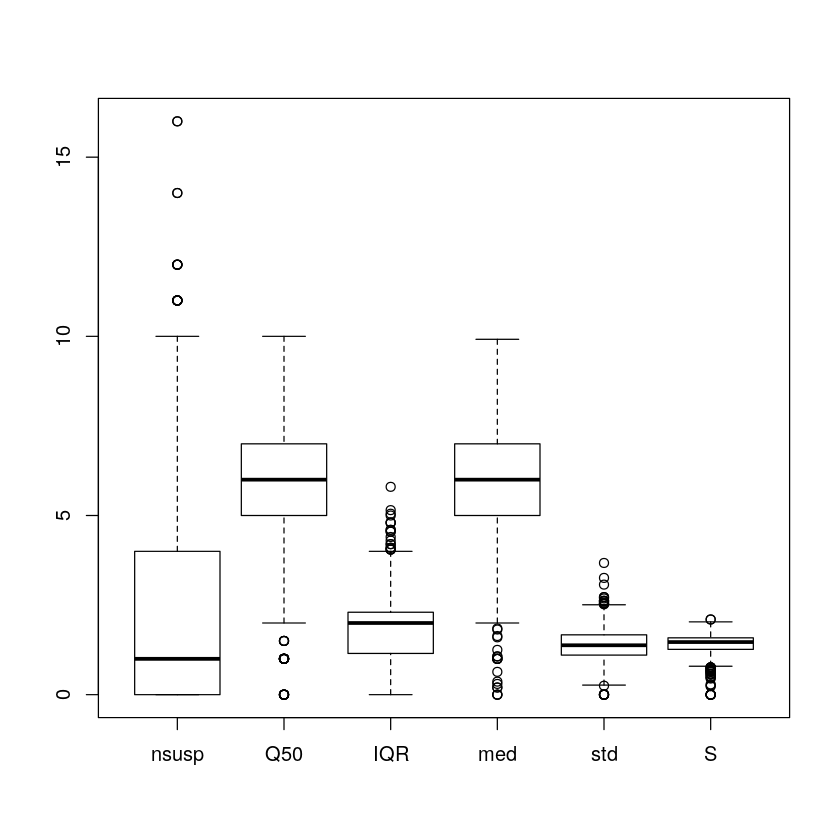

In [5]:
cor(data[,c(6:13)])
boxplot(data[,c(8:13)])

Para ninguna de las variables se observan diferencias significativas entre enseñanzas.

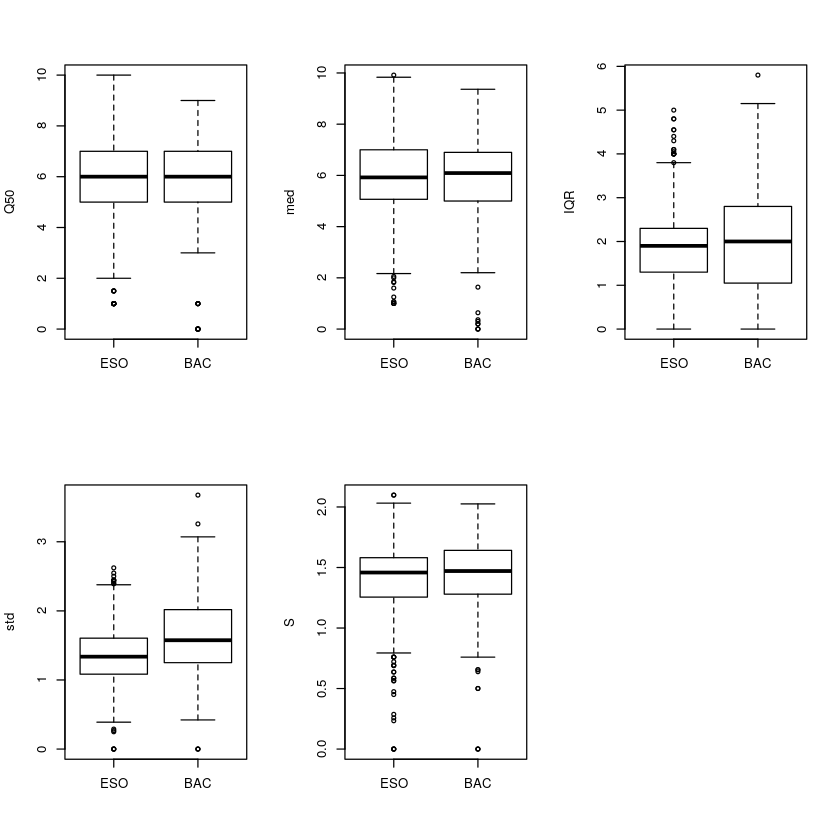

In [6]:
par(mfrow=c(2,3))
boxplot(data$Q50~data$Ens,ylab='Q50')
boxplot(data$med~data$Ens,ylab='med')
boxplot(data$IQR~data$Ens,ylab='IQR')
boxplot(data$std~data$Ens,ylab='std')
boxplot(data$S~data$Ens,ylab='S')

Tampoco se observan diferencias significativas entre los cuatro niveles de ESO

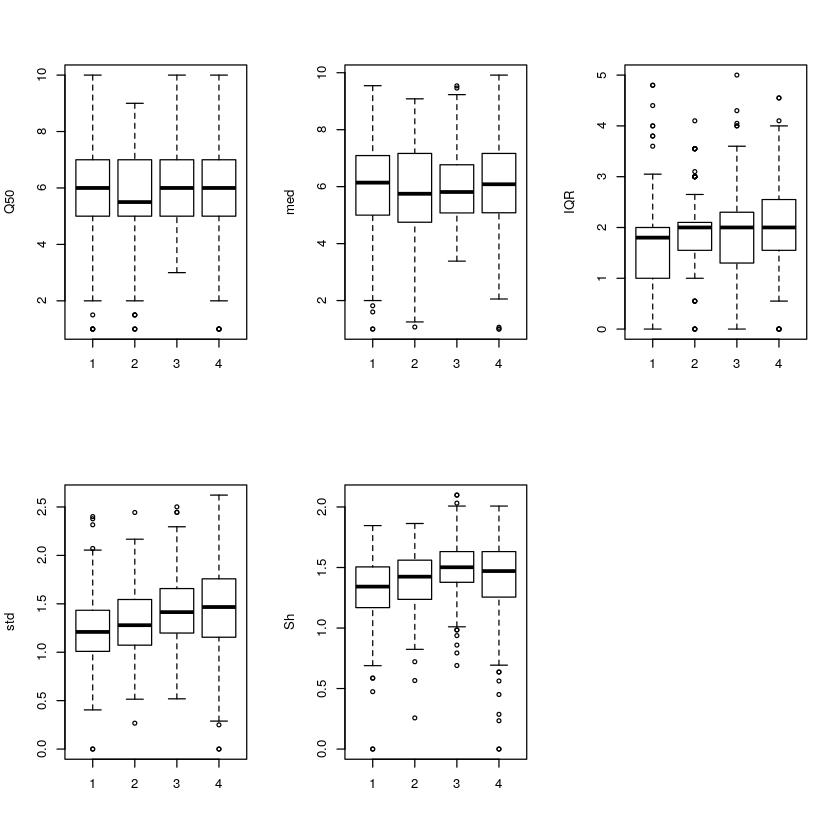

In [7]:
par(mfrow=c(2,3))
dataESO=data[data$Ens=='ESO',]
boxplot(dataESO$Q50~dataESO$Nivel,ylab='Q50')

boxplot(dataESO$med~dataESO$Nivel,ylab='med')
boxplot(dataESO$IQR~dataESO$Nivel,ylab='IQR')
boxplot(dataESO$std~dataESO$Nivel,ylab='std')
boxplot(dataESO$S~dataESO$Nivel,ylab='Sh')

Al considerar los datos por evaluaciones parece que puede haber una relación entre las medidas de dispersión y las evaluaciones.

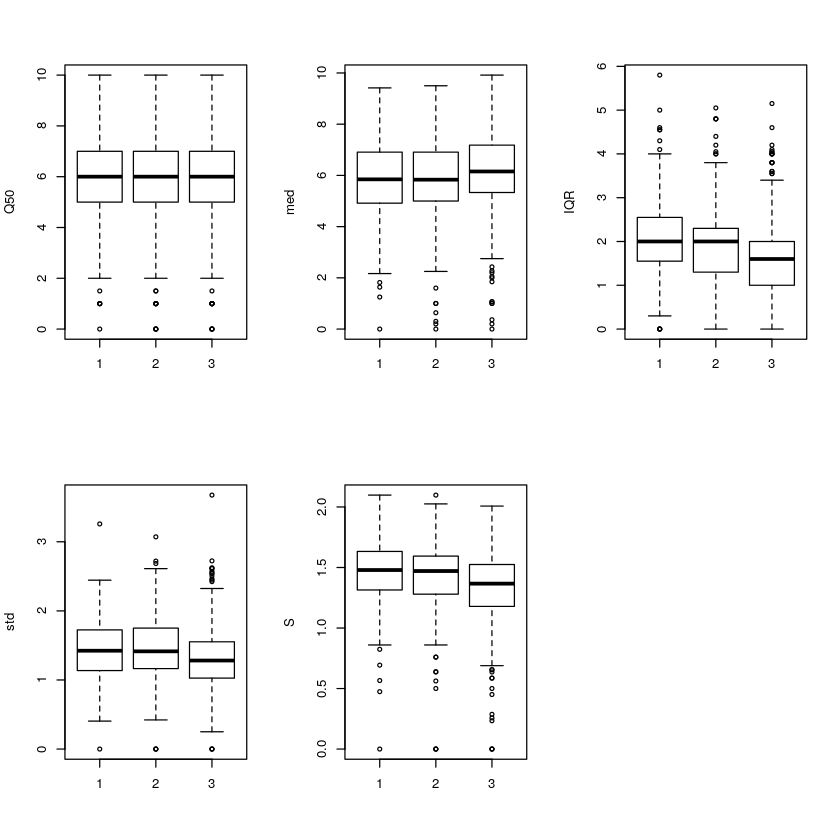

In [8]:
par(mfrow=c(2,3))
boxplot(data$Q50~data$aval,ylab='Q50')
boxplot(data$med~data$aval,ylab='med')
boxplot(data$IQR~data$aval,ylab='IQR')
boxplot(data$std~data$aval,ylab='std')
boxplot(data$S~data$aval,ylab='S')

En el caso del IQR la evaluación explica en torno al 2% de la variabilidad.


Call:
lm(formula = data$IQR ~ data$aval)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0261 -0.7248 -0.0261  0.4246  3.7739 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.17671    0.06634  32.814  < 2e-16 ***
data$aval   -0.15065    0.03071  -4.906 1.06e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8521 on 1153 degrees of freedom
Multiple R-squared:  0.02045,	Adjusted R-squared:  0.0196 
F-statistic: 24.07 on 1 and 1153 DF,  p-value: 1.063e-06


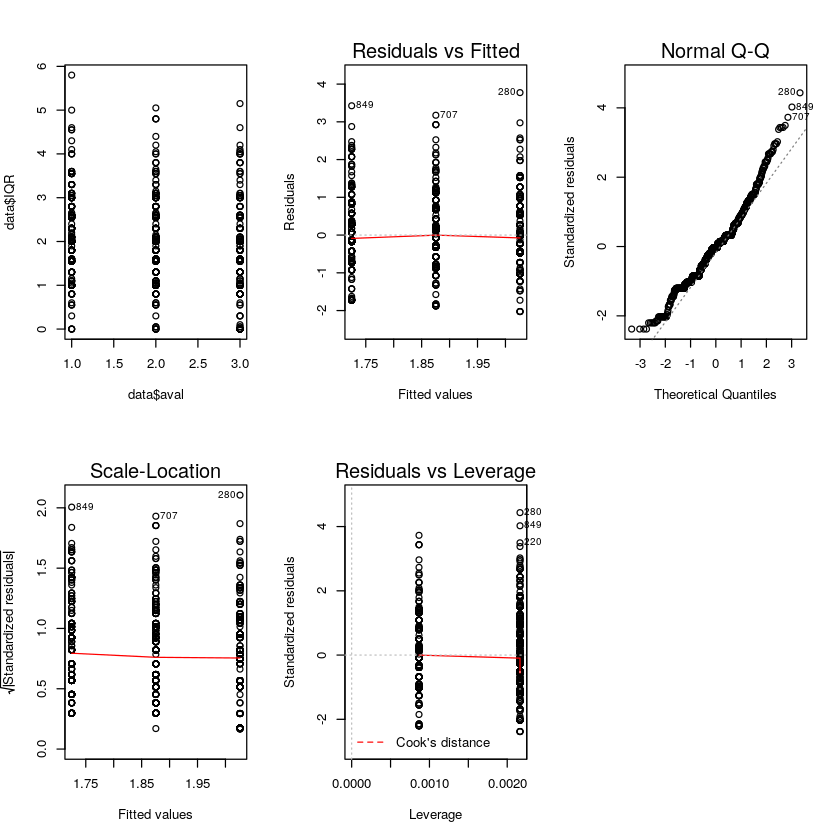

In [9]:
par(mfrow=c(2,3))
summary(lm(data$IQR~data$aval))
plot(data$aval,data$IQR)
plot(lm(data$IQR~data$aval))


Call:
lm(formula = data$S ~ data$aval)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.46890 -0.14503  0.04121  0.17540  0.68946 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.52911    0.02184  70.020  < 2e-16 ***
data$aval   -0.06021    0.01011  -5.956 3.42e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2805 on 1153 degrees of freedom
Multiple R-squared:  0.02985,	Adjusted R-squared:  0.02901 
F-statistic: 35.48 on 1 and 1153 DF,  p-value: 3.422e-09


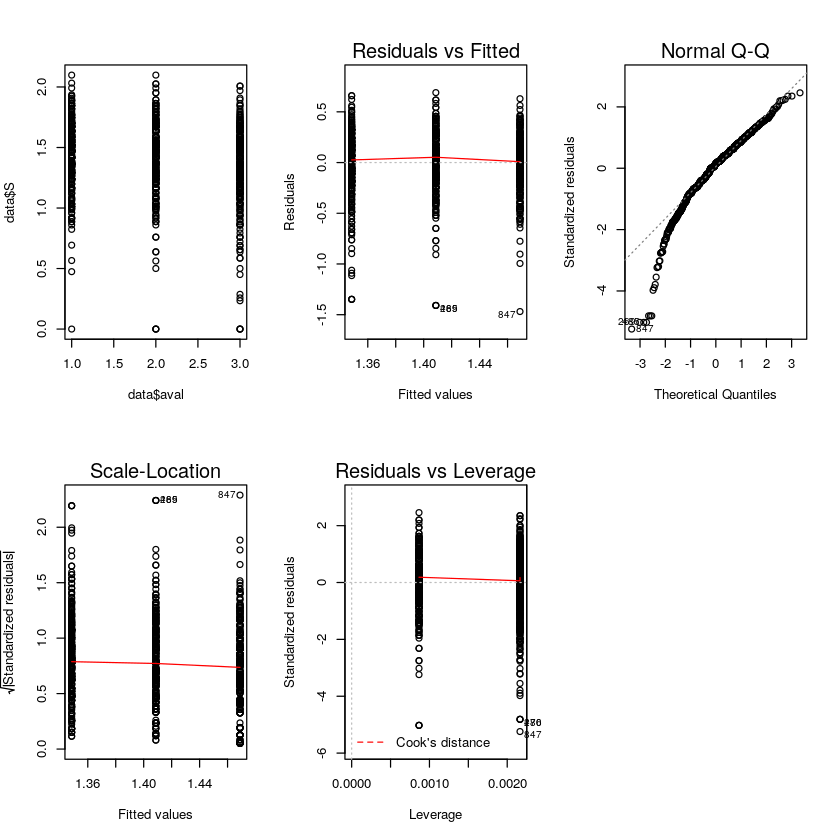

In [10]:
par(mfrow=c(2,3))
summary(lm(data$S~data$aval))
plot(data$aval,data$S)
plot(lm(data$S~data$aval))

Podemos representar los resultados de cada individuo en el plano definido por las combinaciones de las medidas de posición (Q50, media) y de dispersión (recorrido intercuartílico, _IQR_, desviación típica, _std_ y entropía, *S*. A los puntos resultantes se les aplica un código de color según el número de suspensos. En el plano se representa también la estimación KDE (_kernel density estimate_) de la densidad de probabilidad.

In [11]:
#Codigo de color para el numero de suspensos
mcolor=c()
for (i in data$nsusp) {
    if (i>=5){
        mcolor=rbind(mcolor,'red')
    }
    else if (i>3){
        mcolor=rbind(mcolor,'green')
    
    }
    else if (i==2){
        mcolor=rbind(mcolor,'blue')
    }
    else if (i==1){
        mcolor=rbind(mcolor,'black')
    }
    else{
        mcolor=rbind(mcolor,'white')
    } 
        
    
}

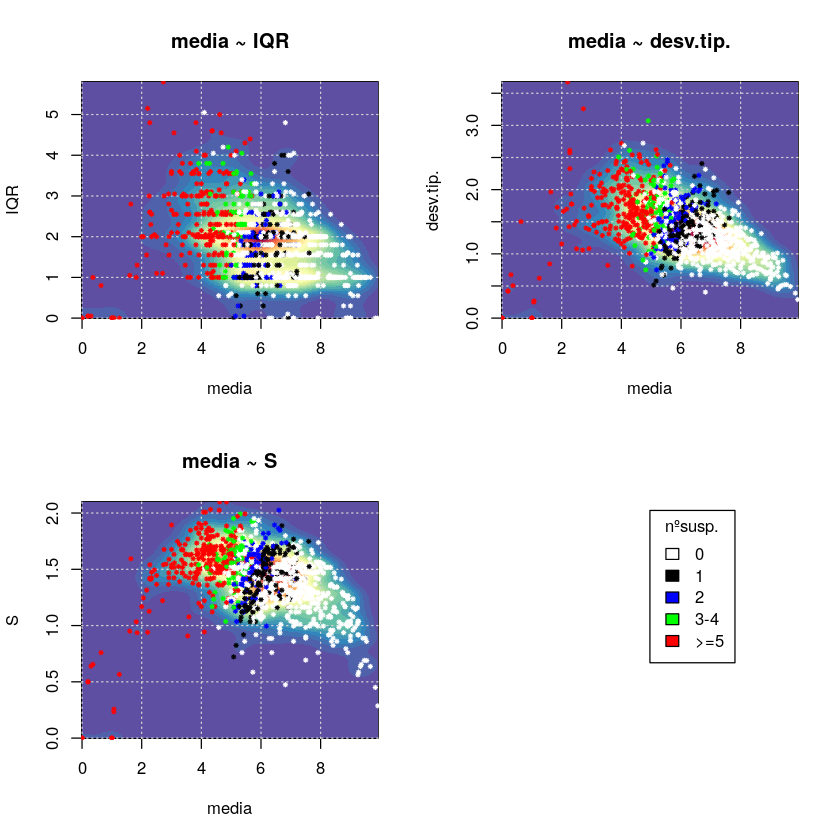

In [12]:
par(mfrow=c(2,2))
dt=as.data.frame(cbind(data$med,data$IQR))
labs=c('media','IQR')
kernel=kde2d(dt[,1],dt[,2],n=400)
imageKernel(kernel,xlab=labs[1],ylab=labs[2],puntos=cbind(dt[,1],dt[,2]),col=mcolor,
            tit = paste(labs[1],'~',labs[2]))

dt=as.data.frame(cbind(data$med,data$std))
labs=c('media','desv.tip.')
kernel=kde2d(dt[,1],dt[,2],n=400)
imageKernel(kernel,xlab=labs[1],ylab=labs[2],puntos=cbind(dt[,1],dt[,2]),col=mcolor,
            tit = paste(labs[1],'~',labs[2]))

dt=as.data.frame(cbind(data$med,data$S))
labs=c('media','S')
kernel=kde2d(dt[,1],dt[,2],n=400)
imageKernel(kernel,xlab=labs[1],ylab=labs[2],puntos=cbind(dt[,1],dt[,2]),col=mcolor,
            tit = paste(labs[1],'~',labs[2]))
plot(c(0,1),c(0,1),axes=FALSE,xlab='',ylab='',col='white')
legend(0.5,1,legend=c('0','1','2','3-4','>=5'),fill =c('white','black','blue','green','red') ,title = 'nºsusp.')

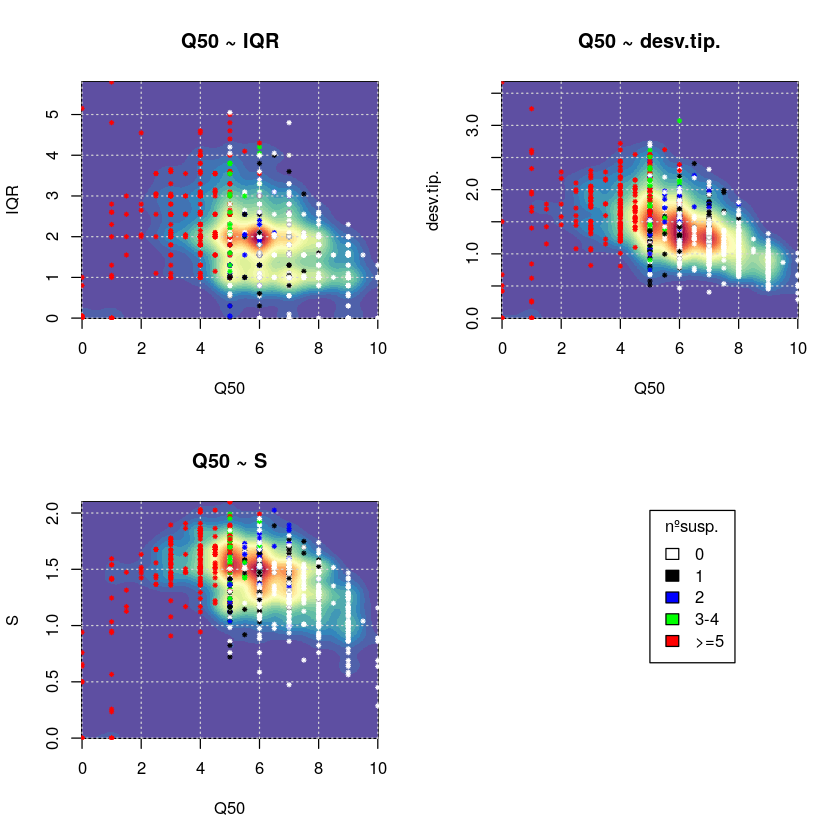

In [13]:
par(mfrow=c(2,2))
dt=as.data.frame(cbind(data$Q50,data$IQR))
labs=c('Q50','IQR')
kernel=kde2d(dt[,1],dt[,2],n=400)
imageKernel(kernel,xlab=labs[1],ylab=labs[2],puntos=cbind(dt[,1],dt[,2]),col=mcolor,
            tit = paste(labs[1],'~',labs[2]))

dt=as.data.frame(cbind(data$Q50,data$std))
labs=c('Q50','desv.tip.')
kernel=kde2d(dt[,1],dt[,2],n=400)
imageKernel(kernel,xlab=labs[1],ylab=labs[2],puntos=cbind(dt[,1],dt[,2]),col=mcolor,
            tit = paste(labs[1],'~',labs[2]))

dt=as.data.frame(cbind(data$Q50,data$S))
labs=c('Q50','S')
kernel=kde2d(dt[,1],dt[,2],n=400)
imageKernel(kernel,xlab=labs[1],ylab=labs[2],puntos=cbind(dt[,1],dt[,2]),col=mcolor,
            tit = paste(labs[1],'~',labs[2]))
plot(c(0,1),c(0,1),axes=FALSE,xlab='',ylab='',col='white')
legend(0.5,1,legend=c('0','1','2','3-4','>=5'),fill =c('white','black','blue','green','red') ,title = 'nºsusp.')

La separación más neta parece conseguirse en el plano {Q50-IQR}

Una vez decidido el plano los resultados de cada individuo se convierten en el punto $ R=(Q50;IQR)$. Puede definirse un gradiente en este plano como $\overrightarrow Q=R_n- R_m$ donde $m,n$ son evaluaciones.  
Es evidente la existencia de un punto óptimo (10,0). Si definimos un vector unitario que señale la dirección del punto óptimo, $\overrightarrow N=(10-Q50; -IQR)$ entonces el producto escalar $\overrightarrow N \cdot \overrightarrow Q$ puede considerarse un índice de mejora.

Obtenemos las diferencias entre evaluaciones (2-1, 3-1, 3-2) y los vectores unitarios óptimos  de las evals. 1ª y 2ª

In [20]:
par(mfrow=c(2,2))
Ids=fdata[fdata$aval==1,1]
d12=fdata[fdata$aval==2,8:12]-fdata[fdata$aval==1,8:12]
d12=cbind(Ids,d12)
d23=fdata[fdata$aval==3,8:12]-fdata[fdata$aval==2,8:12]
d23=cbind(Ids,d23)
d13=fdata[fdata$aval==3,8:12]-fdata[fdata$aval==1,8:12]
d13=cbind(Ids,d13)
n1=c(10,0,10,0)-fdata[fdata$aval==1,8:12]
n2=c(10,0,10,0)-fdata[fdata$aval==2,8:12]



Calculamos los índices de mejora para el paso de la 1ª a la 2ª (_I12_) y de la 2ª a la 3ª (_I23_) y el indice global del curso (_I13_)

,I12,I13,I23
I12,1.0000000,0.6054092,-0.3545286
I13,0.6054092,1.0000000,0.5180565
I23,-0.3545286,0.5180565,1.0000000


      I12               I13                I23         
 Min.   :-2.4994   Min.   :-2.11693   Min.   :-2.8565  
 1st Qu.:-0.5610   1st Qu.:-0.56000   1st Qu.:-0.4216  
 Median : 0.0000   Median : 0.03922   Median : 0.0000  
 Mean   : 0.0573   Mean   : 0.11359   Mean   : 0.1040  
 3rd Qu.: 0.7071   3rd Qu.: 0.74741   3rd Qu.: 0.6139  
 Max.   : 2.5396   Max.   : 5.15000   Max.   : 5.1500  

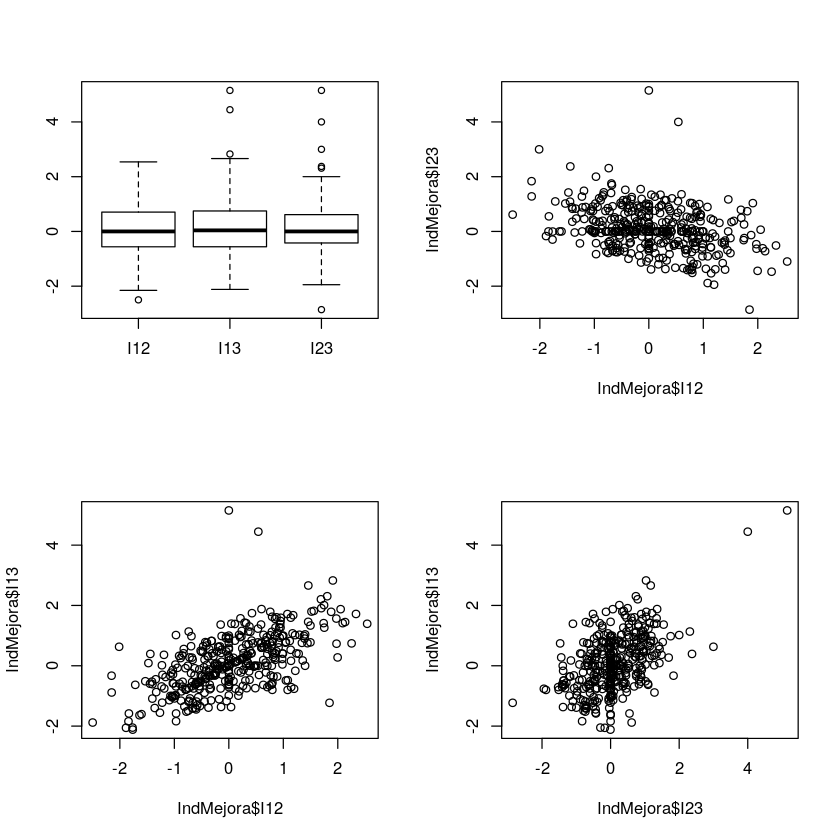

In [21]:
calcMejora =function(N,R) {
    modulo=sqrt(N$Q50^2+N$IQR^2)
    N$Q50=N$Q50/modulo
    N$IQR=N$IQR/modulo
    return (R$Q50*N$Q50+R$IQR*N$IQR)
}

par(mfrow=c(2,2))
IndMejora=data.frame('I12'=calcMejora(n1,d12),'I13'=calcMejora(n1,d13),'I23'=calcMejora(n2,d23))
boxplot(IndMejora)
plot(IndMejora$I12,IndMejora$I23)
plot(IndMejora$I12,IndMejora$I13)
plot(IndMejora$I23,IndMejora$I13)
cor(IndMejora)
summary(IndMejora)

Destaca la correlación negativa entre _I12_ y _I23_ (-0.35) y la relativamente alta correlación entre I12 e I13 (0.61)

Podemos simplificar clasificando los índices en 3 categorias:
* M: índice >0.5
* E: índice <-0.5
* 0: índice $\in [-0.5; 0.5]$ 

In [16]:
etiqueta = function (item) {
    if (abs(item)<0.5) {
        return('0')
    }
    else if (item>0) {
        return('M')
    }
    else {
        return('E')
    }
}
labels=c()
for (i1 in c('0','E','M')){
    for (i2 in c('0','E','M')) {
        for (i3 in c('0','E','M')){
            labels=append(labels,paste(i1,i2,i3))
        }
    }
}
etQ=data.frame('label'=labels,'count'=c(0)*length(labels))
for (indx in c(1:lengths(IndMejora)[1])){
    item=IndMejora[indx,]
    ticket=paste(etiqueta(item[1]),etiqueta(item[3]),etiqueta(item[2]))
    etQ[etQ$label==ticket,2]=etQ[etQ$label==ticket,2]+1
}
etQ$frec=etQ$count/sum(etQ$count)
etQ=etQ[order(-etQ$frec),]
etQ$acum=cumsum(etQ$frec)

etQ[etQ$acum<=0.95,]

,label,count,frec,acum
1,0 0 0,75,0.19480519,0.1948052
11,E 0 E,51,0.13246753,0.3272727
21,M 0 M,47,0.12207792,0.4493506
9,0 M M,36,0.09350649,0.5428571
16,E M 0,26,0.06753247,0.6103896
5,0 E E,22,0.05714286,0.6675325
22,M E 0,22,0.05714286,0.7246753
27,M M M,21,0.05454545,0.7792208
14,E E E,11,0.02857143,0.8077922
23,M E E,11,0.02857143,0.8363636


Y 14 de las 27 posibles etiquetas acumulan el 94% de las observaciones

Los individuos que muestran una mejora global ( $1ª \rightarrow 3ª$ ) 

In [17]:
aux=etQ[(endsWith(as.character(etQ$label),"M") & etQ$frec>0),1:3]
aux$frec=aux$count/sum(aux$count)
aux$label=as.factor(aux$label)
(paste(round(sum(aux$count)/sum(etQ$count)*100,digits = 2),'% de los sujetos'))
aux

[1] "32.21 % de los sujetos"

,label,count,frec
21,M 0 M,47,0.37903226
9,0 M M,36,0.29032258
27,M M M,21,0.16935484
24,M E M,9,0.07258065
18,E M M,6,0.04838710
3,0 0 M,5,0.04032258


Destaca que el 67% de los sujetos solo muestran mejora en 1 de las evaluaciones ( $1ª \rightarrow 2ª$ o  $2ª \rightarrow 3ª$) y el 17% una mejora constante.  

Los individuos que muestran un descenso global ( $1ª \rightarrow 3ª$)

In [18]:
aux=etQ[(endsWith(as.character(etQ$label),"E") & etQ$frec>0),1:3]
aux$frec=aux$count/sum(aux$count)
aux$label=as.factor(aux$label)
(paste(round(sum(aux$count)/sum(etQ$count)*100,digits = 2),'% de los sujetos'))
aux

[1] "28.31 % de los sujetos"

,label,count,frec
11,E 0 E,51,0.46788991
5,0 E E,22,0.20183486
14,E E E,11,0.10091743
23,M E E,11,0.10091743
17,E M E,9,0.08256881
2,0 0 E,5,0.04587156


Destaca el 68% empeora solo en una de las evaluaciones y un 10% muestra un empeoramiento constante. Es notable que un 18% muestra un episodio de mejora.

Los individuos que no muestran una tendencia global

In [19]:
aux=etQ[(endsWith(as.character(etQ$label),"0") & etQ$frec>0),1:3]
aux$frec=aux$count/sum(aux$count)
aux$label=as.factor(aux$label)
(paste(round(sum(aux$count)/sum(etQ$count)*100,digits = 2),'% de los sujetos'))
aux

[1] "39.48 % de los sujetos"

,label,count,frec
1,0 0 0,75,0.493421053
16,E M 0,26,0.171052632
22,M E 0,22,0.144736842
7,0 M 0,10,0.065789474
19,M 0 0,10,0.065789474
4,0 E 0,4,0.026315789
10,E 0 0,4,0.026315789
25,M M 0,1,0.006578947


Destaca el 49% sin tendencia nunca, el 32% que muestra 1 episodio de mejora y otro de empeoramiento, el 13% muestra un solo episodio de mejora y el 5% un solo episodio de empeoramiento